In [12]:
import os
import openai
import dotenv
import pandas as pd
import seaborn as sns
from openai.embeddings_utils import get_embedding, cosine_similarity

In [13]:
# .env file must have OPENAI_API_KEY and OPENAI_API_BASE
dotenv.load_dotenv()
openai.api_type = "azure"
openai.api_base = os.getenv("OPENAI_API_BASE")
openai.api_version = "2023-03-15-preview"
openai.api_key = os.getenv("OPENAI_API_KEY")

In [14]:
# sample text in string
sample_text1 = "Azure Machine Learning is for data scientists, data engineers, and AI developers to build, train, deploy, and manage machine learning models."
sample_text2 = "I recommend AzureML to data scientists for building, training, deploying, and managing machine learning models."
sample_text3 = "There are many ways to consume coffee. Espresso, Latte and Cappuccino are popular ways to consume coffee. In addition to these, ice coffee is also popular."
sample_text4 = "IT professional looking up in air, holding a scrolled old paper in the right hand and clicking in upper space as. On the other side there is a robot  that has AI trying to respond to the human use matrix as background and have magic spell overlapped with the background"
sample_text5 = "Charming family home nestled in a tranquil neighborhood. This spacious abode boasts four bedrooms, three bathrooms, and a modern kitchen. Open-concept living area perfect for entertaining. Large windows bathe rooms in natural light. Landscaped backyard ideal for summer BBQs. Two-car garage. Close to schools and amenities. A warm, welcoming space to create lasting memories."
sample_text6 = "Inspect the jet engine thoroughly. Identify any visible damage. Check for leaks, cracks, or signs of wear. Replace faulty components. Clean the engine using approved solvents. Test engine systems for proper operation. Monitor performance metrics. Adjust settings as needed. Document all actions taken. Ensure safety procedures are followed at all times."

samples = [sample_text1, sample_text2, sample_text3, sample_text4, sample_text5, sample_text6]


In [15]:
sample_embeddings = []
for sample in samples:
    sample_embeddings.append(get_embedding(sample, 'text-embedding-ada-002'))
    # print("embedding:", sample_embedding)


for idx, sampele_embedding in enumerate(sample_embeddings):
    print(f"[{str(idx + 1)}] sample embedding:", sampele_embedding[0:4], "...")


[1] sample embedding: [-0.010329940356314182, -0.0025743793230503798, 0.018027139827609062, -0.02558816410601139] ...
[2] sample embedding: [-0.03108876384794712, -0.005723757669329643, -0.007633872330188751, -0.012909741140902042] ...
[3] sample embedding: [-0.002943769097328186, 0.0006965725333429873, 0.015242736786603928, -0.05228932574391365] ...
[4] sample embedding: [-0.009102458134293556, -0.009505342692136765, -0.01608806662261486, -0.018423430621623993] ...
[5] sample embedding: [0.012410880997776985, 0.03472727909684181, 0.0020867283456027508, -0.005899515468627214] ...
[6] sample embedding: [-0.008191904053092003, 0.004803853575140238, -0.021335827186703682, -0.027525851503014565] ...


<Axes: >

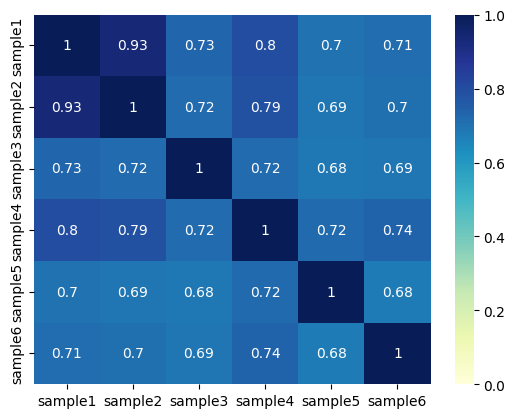

In [16]:
# get cosine similarity between sample texts
results = []
cosine_similarities = []
for i in range(len(sample_embeddings)):
    result = {}
    for j in range(len(sample_embeddings)):
        similarity = cosine_similarity(sample_embeddings[i], sample_embeddings[j])
        cosine_similarities.append(similarity)
        # add result to dict
        result[f"sample{j+1}"] = similarity
    results.append(result)

df = pd.DataFrame(results, index=["sample1", "sample2", "sample3", "sample4", "sample5", "sample6"])
sns.heatmap(df, annot=True, vmin=0, vmax=1, cmap="YlGnBu")
